In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary(expand_nested=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 2, 2, 128)      

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
   1/1563 [..............................] - ETA: 9:30 - loss: 2.3161 - accuracy: 0.0312

2023-02-22 21:15:56.344235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.6536 - accuracy: 0.3809

2023-02-22 21:16:12.116970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.6536 - accuracy: 0.3809 - val_loss: 1.4009 - val_accuracy: 0.4914
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2741 - accuracy: 0.5419 - val_loss: 1.1923 - val_accuracy: 0.5722
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1111 - accuracy: 0.6054 - val_loss: 1.0677 - val_accuracy: 0.6245
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0006 - accuracy: 0.6454 - val_loss: 0.9970 - val_accuracy: 0.6522
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9125 - accuracy: 0.6770 - val_loss: 0.9669 - val_accuracy: 0.6613
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8422 - accuracy: 0.7045 - val_loss: 0.8973 - val_accuracy: 0.6859
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7905 - accuracy: 0.7213 - val_loss: 0.8931 - val_accura

313/313 - 1s - loss: 0.8384 - accuracy: 0.7133 - 1s/epoch - 4ms/step
0.7133000493049622


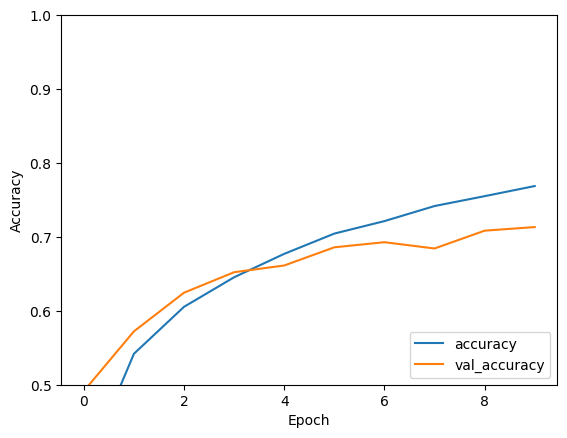

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [47]:
inputs = keras.Input(shape=(32, 32, 3))

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(inputs, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_54 (Conv2D)             (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_55 (Conv2D)             (None, 32, 32, 32)   9248        ['conv2d_54[0][0]']              
                                                                                                  
 max_pooling2d_41 (MaxPooling2D  (None, 16, 16, 32)  0           ['conv2d_55[0][0]']              
 )                                                                                          

Epoch 1/10


2023-02-22 22:07:39.182330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5173 - accuracy: 0.4399

2023-02-22 22:08:03.457111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 27s 17ms/step - loss: 1.5173 - accuracy: 0.4399 - val_loss: 1.1637 - val_accuracy: 0.5836
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0050 - accuracy: 0.6433 - val_loss: 0.9137 - val_accuracy: 0.6770
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7960 - accuracy: 0.7184 - val_loss: 0.7641 - val_accuracy: 0.7359
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6566 - accuracy: 0.7711 - val_loss: 0.6755 - val_accuracy: 0.7662
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5587 - accuracy: 0.8046 - val_loss: 0.6709 - val_accuracy: 0.7707
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4872 - accuracy: 0.8295 - val_loss: 0.6061 - val_accuracy: 0.7911
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4212 - accuracy: 0.8529 - val_loss: 0.6164 - val_accura

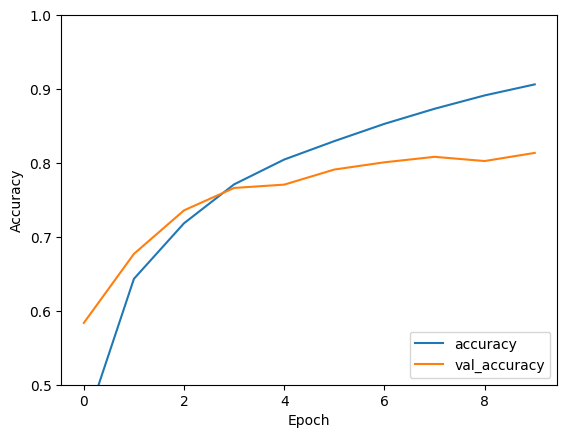

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [49]:
inputs = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(inputs)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_63 (Conv2D)             (None, 28, 28, 32)   2400        ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 28, 28, 32)  128         ['conv2d_63[0][0]']              
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 28, 28, 32)   0           ['batch_normalization[0][0]

Epoch 1/10


2023-02-22 22:12:20.108281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.3738 - accuracy: 0.5004

2023-02-22 22:13:01.829155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 46s 27ms/step - loss: 1.3738 - accuracy: 0.5004 - val_loss: 1.4625 - val_accuracy: 0.5005
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0013 - accuracy: 0.6476 - val_loss: 1.4070 - val_accuracy: 0.5338
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8507 - accuracy: 0.7025 - val_loss: 1.1267 - val_accuracy: 0.6268
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7529 - accuracy: 0.7375 - val_loss: 0.9088 - val_accuracy: 0.6925
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6836 - accuracy: 0.7632 - val_loss: 0.8207 - val_accuracy: 0.7219
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6310 - accuracy: 0.7798 - val_loss: 0.7241 - val_accuracy: 0.7525
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5794 - accuracy: 0.7980 - val_loss: 0.8613 - val_accura

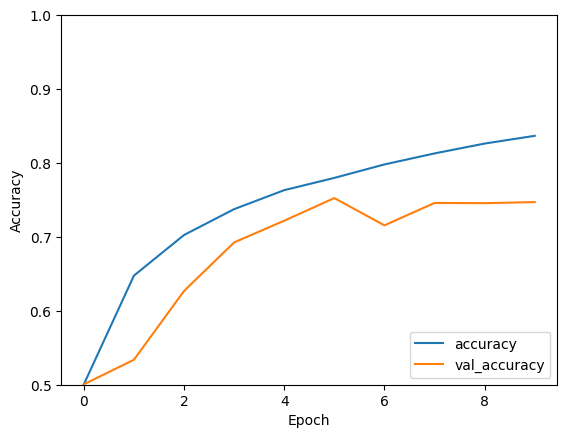

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [8]:
# input_shape = (
#     32,
#     32,
#     3,
# )
# base_model = tf.keras.applications.vgg16.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_shape=input_shape,
# )
# base_model.trainable = False

# inputs = tf.keras.Input(shape=input_shape)
# prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

# # chain up the layers
# # x = tf.cast(inputs, tf.float32)
# x = tf.keras.applications.vgg16.preprocess_input(inputs)
# x = base_model(x, training=False)
# x = GlobalAveragePooling2D()(x)
# # let's add a fully-connected layer
# # x = Dense(1024, activation='relu')(x)
# outputs = prediction_layer(x)
# model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

# model.summary()


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-12 10:37:26.301095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-12 10:37:26.301219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=12, 
#                     validation_data=(test_images, test_labels))

Epoch 1/12


2023-02-12 10:37:27.099342: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-12 10:37:27.292711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5378 - accuracy: 0.4783

2023-02-12 10:37:48.196249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 25s 16ms/step - loss: 1.5378 - accuracy: 0.4783 - val_loss: 1.3743 - val_accuracy: 0.5284
Epoch 2/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3097 - accuracy: 0.5529 - val_loss: 1.3031 - val_accuracy: 0.5521
Epoch 3/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2506 - accuracy: 0.5721 - val_loss: 1.2651 - val_accuracy: 0.5630
Epoch 4/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2183 - accuracy: 0.5823 - val_loss: 1.2462 - val_accuracy: 0.5709
Epoch 5/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1959 - accuracy: 0.5890 - val_loss: 1.2306 - val_accuracy: 0.5739
Epoch 6/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1800 - accuracy: 0.5951 - val_loss: 1.2173 - val_accuracy: 0.5800
Epoch 7/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1692 - accuracy: 0.5979 - val_loss: 1.2141 - val_accura

313/313 - 3s - loss: 1.1958 - accuracy: 0.5853 - 3s/epoch - 11ms/step


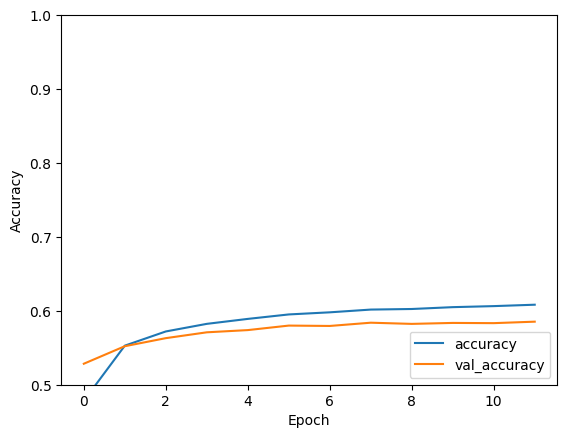

In [10]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
# print(test_acc)

0.5853000283241272


In [13]:
# # Unfreeze the base model
# base_model.trainable = True
# model.summary()

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(1e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=["accuracy"],
# )

# history = model.fit(
#     train_images, train_labels, epochs=5, validation_data=(test_images, test_labels)
# )


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2023-02-12 10:59:30.980743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.3190 - accuracy: 0.8858

2023-02-12 11:00:17.342007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 50s 32ms/step - loss: 0.3190 - accuracy: 0.8858 - val_loss: 0.5553 - val_accuracy: 0.8163
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.2273 - accuracy: 0.9196 - val_loss: 0.5387 - val_accuracy: 0.8268
Epoch 3/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.1627 - accuracy: 0.9435 - val_loss: 0.5644 - val_accuracy: 0.8265
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1180 - accuracy: 0.9606 - val_loss: 0.6229 - val_accuracy: 0.8267
Epoch 5/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.0810 - accuracy: 0.9738 - val_loss: 0.6609 - val_accuracy: 0.8231
